In [4]:
# importer les packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("India_Air_Quality_Data.csv", encoding="cp1252")

C:\Users\tcheg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.head()

stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

In [7]:
data.shape

(435742, 13)

L'ensemble de données comprend 435742 observations et 13 chractéristiques, dont toutes sont des variables indépendantes.


In [12]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
from pandas_profiling import ProfileReport

In [11]:
#rapport complet des differents variable de notre base de donnees 
prof = ProfileReport(data)
prof.to_file(output_file='rapport_data.html')
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# type de variable

data.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [15]:
# valeurs manquantes

data.isna().sum().sort_values()

state                               0
sampling_date                       3
location                            3
date                                7
type                             5393
no2                             16233
location_monitoring_station     27491
so2                             34646
rspm                            40222
stn_code                       144077
agency                         149481
spm                            237387
pm2_5                          426428
dtype: int64

<AxesSubplot:>

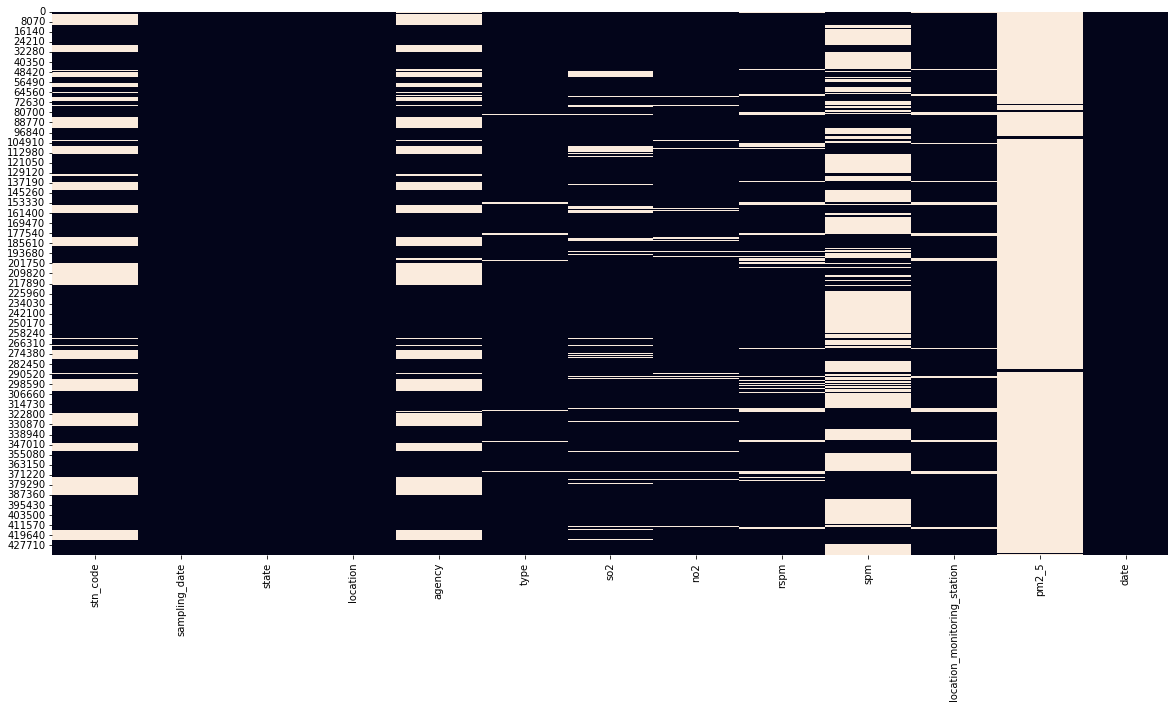

In [16]:
#afficher nos valeurs manquantes

plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)

In [17]:
#le poucentage de nos valeurs manquante dans chaque colomn

(data.isna().sum()/data.shape[0]*100).sort_values()

state                           0.000000
sampling_date                   0.000688
location                        0.000688
date                            0.001606
type                            1.237659
no2                             3.725370
location_monitoring_station     6.309009
so2                             7.951035
rspm                            9.230692
stn_code                       33.064749
agency                         34.304933
spm                            54.478797
pm2_5                          97.862497
dtype: float64

C:\Users\tcheg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


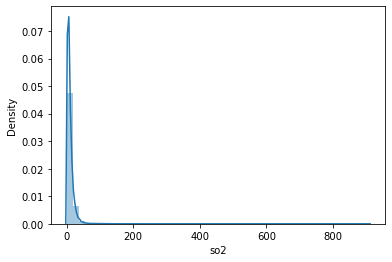

C:\Users\tcheg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


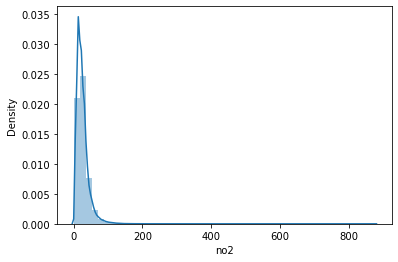

C:\Users\tcheg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


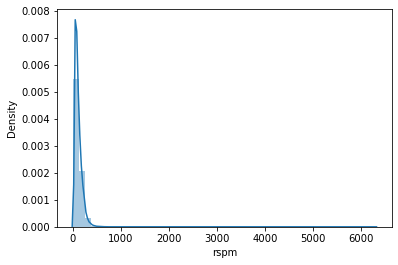

C:\Users\tcheg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


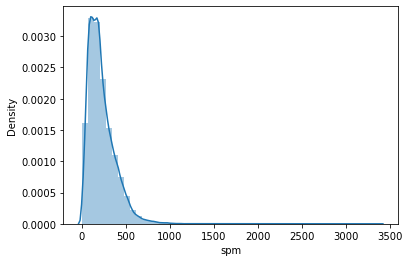

C:\Users\tcheg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


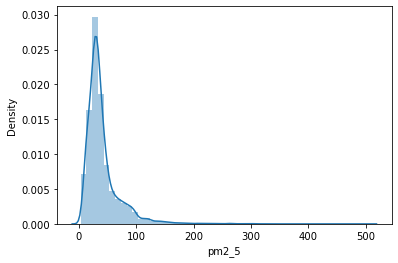

In [18]:
#visiallisation de chaque colonne de notre dataset

for coll in data.select_dtypes('float').columns:
    sns.distplot(data[coll], kde=True)
    plt.show()
    

Toutes les caractéristiques sont positivement asymétriques

In [19]:
# test de shapiro pour verifier la normalité de nos variables

import scipy
def shapiro(df):
    tab ={}
    for cols in df.select_dtypes('float').columns:
        tab[cols] = scipy.stats.shapiro(df[cols])[1] > 0.05
    return tab


In [20]:
# test de normlité

shapiro(data)

C:\Users\tcheg\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'so2': True, 'no2': True, 'rspm': True, 'spm': True, 'pm2_5': True}

toutes nos donnée respect la loi normal

In [21]:
#supression de colonne inutile

data.drop(['stn_code','sampling_date','pm2_5','spm'] , axis=1 , inplace=True)

Nous supprimons les colonnes suivantes

- stn_code : Juste un code et il ne sera pas utile pour l'analyse.

- sampling_data : Nous avons une autre colonne de données avec un format clair

- spm : Les valeurs manquantes sont supérieures à 50%.

- pm2_5 : Les valeurs manquantes sont supérieures à 50%.

In [22]:
data.head()

state   location agency                                type  so2  \
0  Andhra Pradesh  Hyderabad    NaN  Residential, Rural and other Areas  4.8   
1  Andhra Pradesh  Hyderabad    NaN                     Industrial Area  3.1   
2  Andhra Pradesh  Hyderabad    NaN  Residential, Rural and other Areas  6.2   
3  Andhra Pradesh  Hyderabad    NaN  Residential, Rural and other Areas  6.3   
4  Andhra Pradesh  Hyderabad    NaN                     Industrial Area  4.7   

    no2  rspm location_monitoring_station        date  
0  17.4   NaN                         NaN  1990-02-01  
1   7.0   NaN                         NaN  1990-02-01  
2  28.5   NaN                         NaN  1990-02-01  
3  14.7   NaN                         NaN  1990-03-01  
4   7.5   NaN                         NaN  1990-03-01

In [23]:
# Convertir la colonne date en datetime

from datetime import datetime

data['date'] = pd.to_datetime(data['date'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   state                        435742 non-null  object        
 1   location                     435739 non-null  object        
 2   agency                       286261 non-null  object        
 3   type                         430349 non-null  object        
 4   so2                          401096 non-null  float64       
 5   no2                          419509 non-null  float64       
 6   rspm                         395520 non-null  float64       
 7   location_monitoring_station  408251 non-null  object        
 8   date                         435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 29.9+ MB


## gérer des valeurs manquantes

In [26]:
#remplacon toutes les valeurs numeriques par la moyenne de la colonne

for col in list(data.select_dtypes(include='float64')):
    data[col].fillna(data[col].mean(), inplace=True)

In [27]:
data.isna().sum()

state                               0
location                            3
agency                         149481
type                             5393
so2                                 0
no2                                 0
rspm                                0
location_monitoring_station     27491
date                                7
dtype: int64

In [28]:
#nous devons imputation les valeurs nulles des agences et location_monitoring_station à l'aide de 'inconnu'  

data['agency'].fillna('inconnu', inplace=True)
data['location_monitoring_station'].fillna('inconnu', inplace=True)

In [29]:
data.isna().sum()

state                             0
location                          3
agency                            0
type                           5393
so2                               0
no2                               0
rspm                              0
location_monitoring_station       0
date                              7
dtype: int64

In [30]:
data['type'].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

nous remarquons des irregularités dans la colonne type 
exemple :Sensitive Areas et Sensitive Area sont differe uniquement de s 'a' la fin cela peu etre du a une erreur de saisir ou que c'est deux presonnes differentes qui on saisir les donnes. 

In [31]:
data['type']=data['type'].replace(('Residential and others'),('Residential'))
data['type']=data['type'].replace(('Residential, Rural and other Areas'),('RIRUO'))
data['type']=data['type'].replace(('Industrial Area', 'Industrial Areas'),('Industrial', 'Industrial'))
data['type']=data['type'].replace(('Sensitive Area', 'Sensitive Areas'),('Sensitive', 'Sensitive'))

data["type"].value_counts()


RIRUO          180318
Industrial     148071
Residential     86949
Sensitive       15011
Name: type, dtype: int64

In [32]:
data['type'].tail(10)

435732    RIRUO
435733    RIRUO
435734    RIRUO
435735    RIRUO
435736    RIRUO
435737    RIRUO
435738    RIRUO
435739      NaN
435740      NaN
435741      NaN
Name: type, dtype: object

In [33]:
# ramplacons les valeurs manquates par la valeur la plus frequente de la colonne  
data['type'].fillna(data['type'].mode()[0], inplace=True)

In [34]:
data['type'].tail(10)

435732    RIRUO
435733    RIRUO
435734    RIRUO
435735    RIRUO
435736    RIRUO
435737    RIRUO
435738    RIRUO
435739    RIRUO
435740    RIRUO
435741    RIRUO
Name: type, dtype: object

In [35]:
data["type"].value_counts()

RIRUO          185711
Industrial     148071
Residential     86949
Sensitive       15011
Name: type, dtype: int64

In [36]:
#imputons egalement les valeurs manquantes de la colonne location et date avec la valeur la plus frequente de leur colonne respective
data['location'].fillna(data['location'].mode()[0], inplace=True)
data['date'].fillna(data['date'].mode()[0], inplace=True)

In [37]:
data.isna().sum()

state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
location_monitoring_station    0
date                           0
dtype: int64

nous n'avons plus de valeurs manquantes

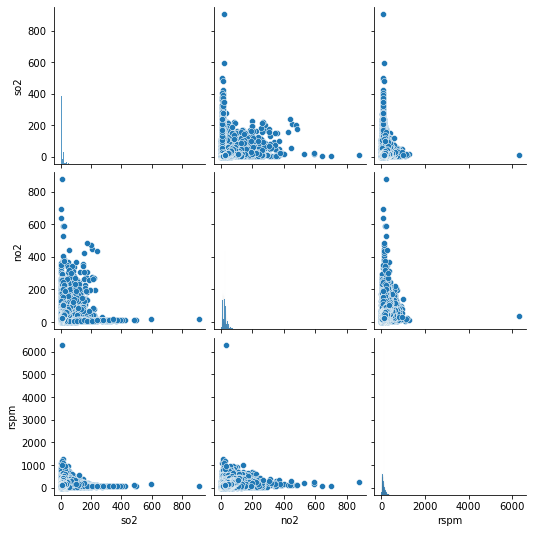

In [38]:
sns.pairplot(data)

In [39]:
data.describe()

so2            no2           rspm
count  435742.000000  435742.000000  435742.000000
mean       10.829414      25.809623     108.832784
std        10.723633      18.155160      71.333148
min         0.000000       0.000000       0.000000
25%         5.000000      14.000000      59.000000
50%         9.000000      22.300000      97.666667
75%        13.000000      32.000000     135.000000
max       909.000000     876.000000    6307.033333

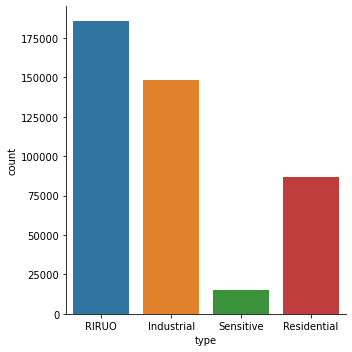

In [31]:
sns.catplot(x = "type", kind = "count",  data = data, height=5)


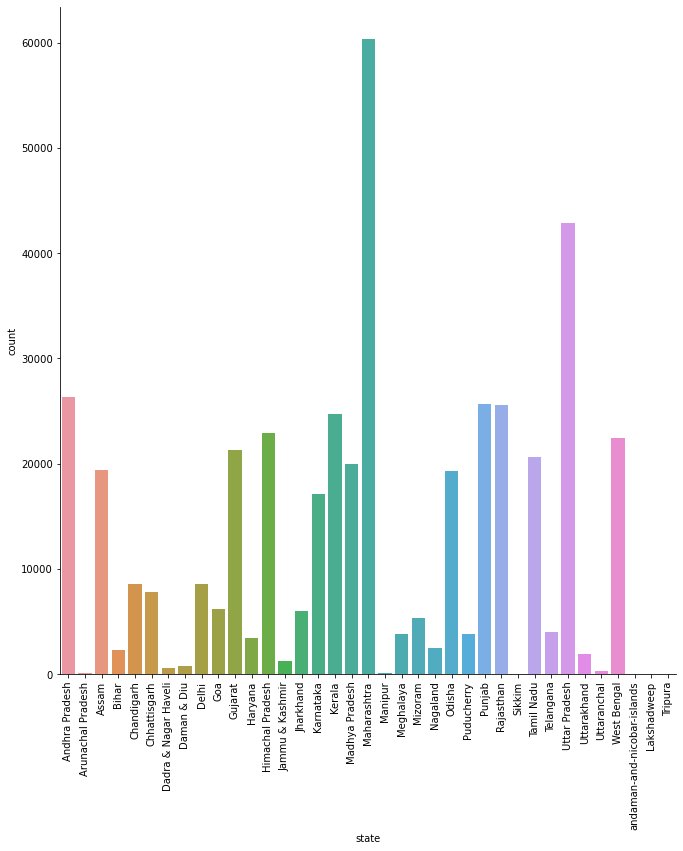

In [40]:

sns.catplot(x = "state", kind = "count",  data = data, height=10).set_xticklabels(rotation=90)


<AxesSubplot:xlabel='state'>

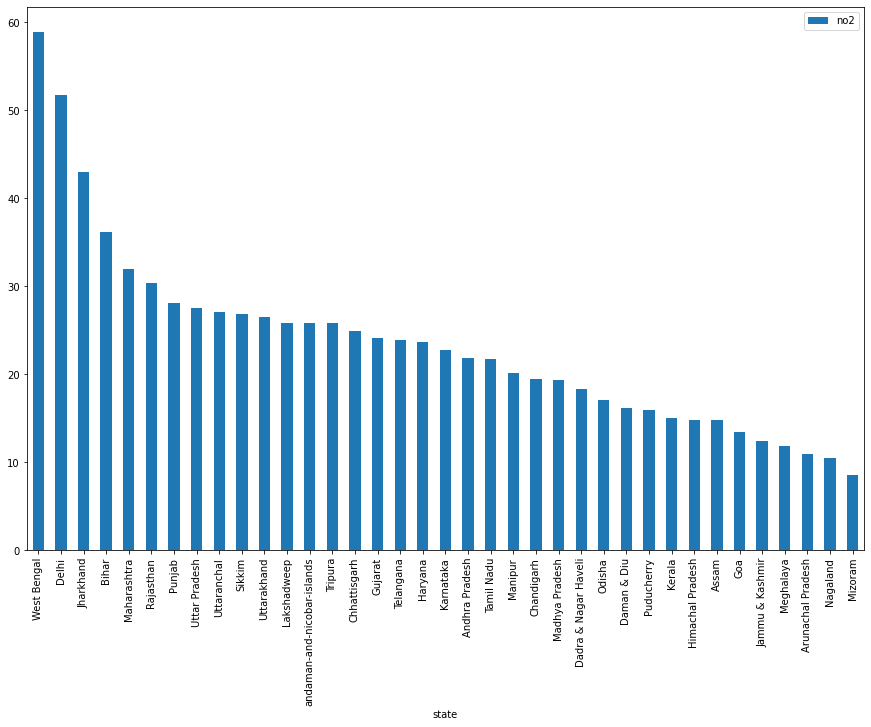

In [41]:

data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2', ascending=False).plot.bar(figsize=(15, 10))

Il est évident, d'après les graphiques ci-dessus, que les niveaux de NO2 sont élevés dans les villes suivantes de West Bengal, Delhi, jharkhand et du Bihar

<AxesSubplot:xlabel='state'>

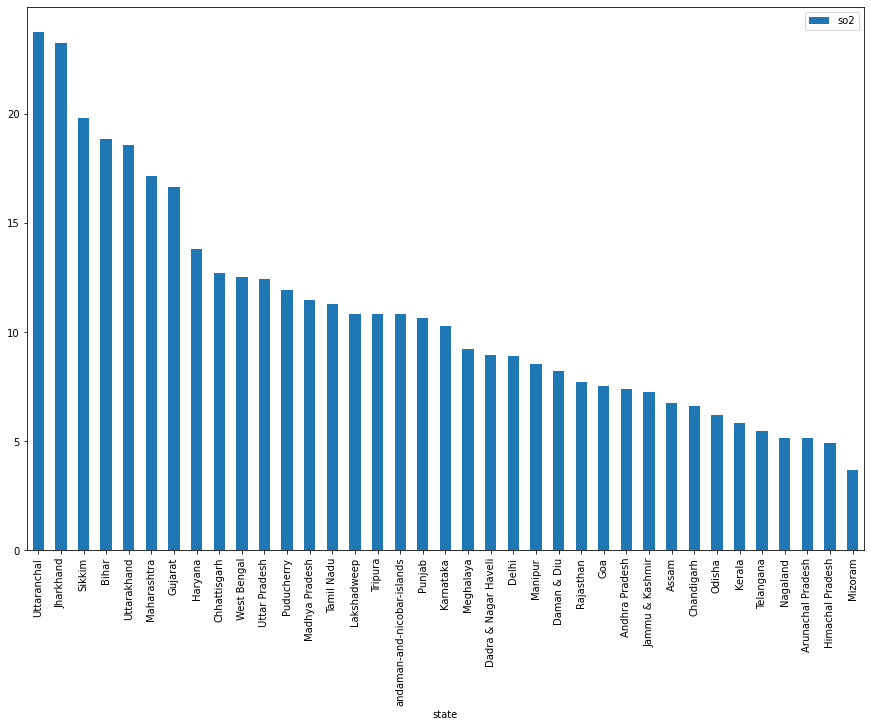

In [59]:

data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2', ascending=False).plot.bar(figsize=(15, 10))

Il est évident, d'après les graphiques ci-dessus, que les niveaux de SO2 sont élevés dans les villes suivantes de Uttaranchal, jharkhand et du Sikkim

<AxesSubplot:xlabel='state'>

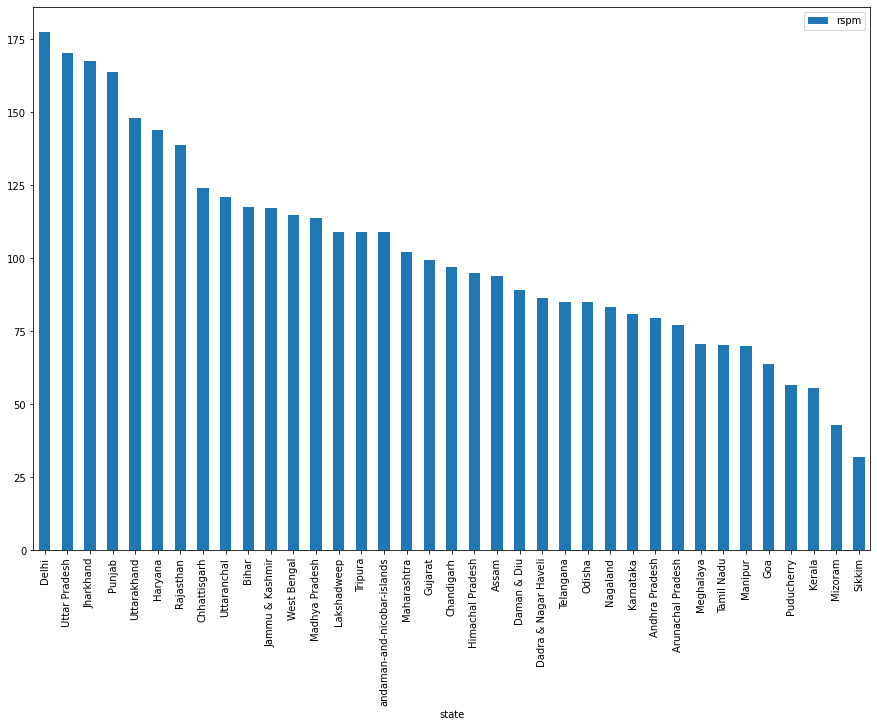

In [43]:

data[['rspm','state']].groupby(["state"]).mean().sort_values(by='rspm', ascending=False).plot.bar(figsize=(15, 10))


Il est évident, d'après les graphiques ci-dessus, que les niveaux de rspm sont élevés dans les villes suivantes de Delhi, l'Uttar Pradesh, jharkhand et du Punjab

## Data time

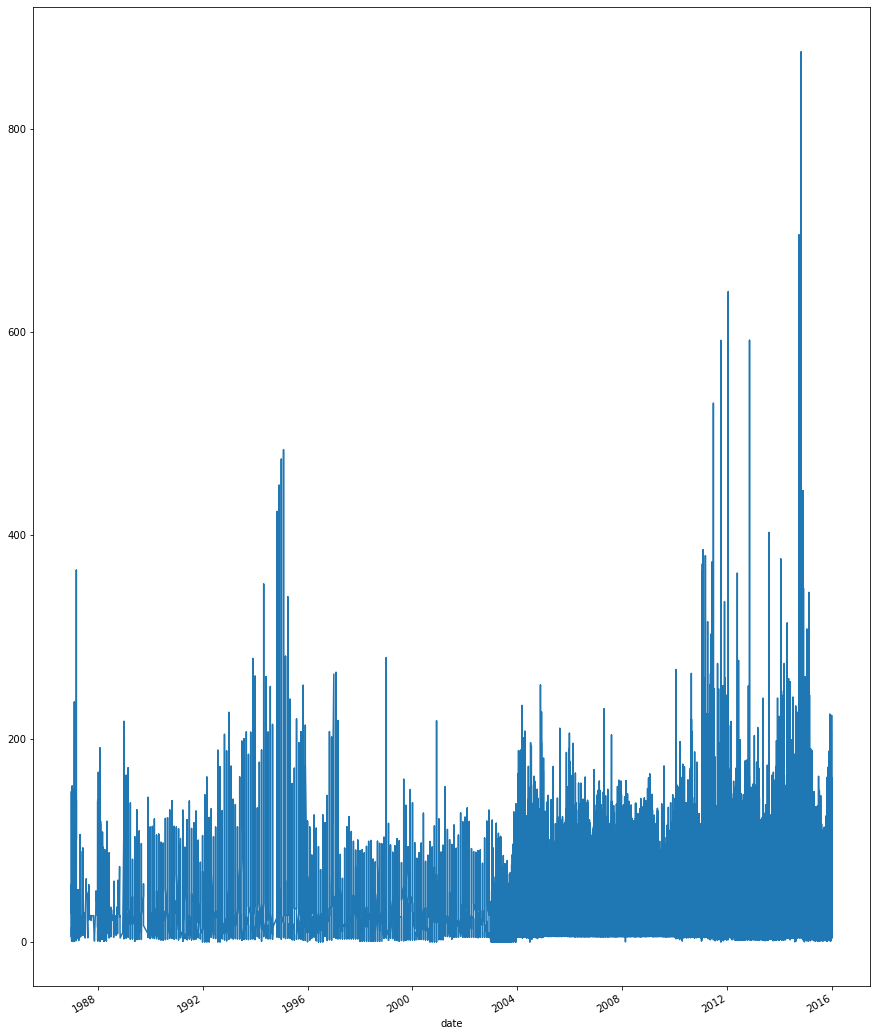

In [44]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)
df['no2'].plot(figsize=(15, 20))
plt.show()


<AxesSubplot:xlabel='so2', ylabel='no2'>

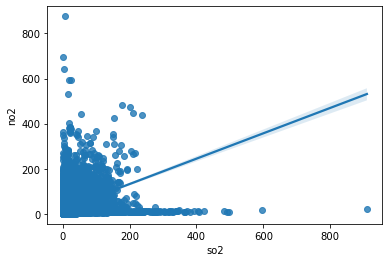

In [46]:
#Étudier la relation entre la proportion de dioxyde de soufre et de dioxyde d'azote.

sns.regplot(x=data['so2'],y=data['no2'],data=data)


Le graphique ci-dessus montre qu'au fil des ans, il y a eu une augmentation continue de la proportion de dioxyde de soufre et de dioxyde d'azote.


                          state        no2        so2
35                  West Bengal  58.852111  12.517750
8                         Delhi  51.728223   8.918570
14                    Jharkhand  42.975080  23.235550
3                         Bihar  36.173283  18.825122
19                  Maharashtra  31.988282  17.143621
27                    Rajasthan  30.375851   7.699848
26                       Punjab  28.044733  10.636675
32                Uttar Pradesh  27.548280  12.428220
34                  Uttaranchal  27.068044  23.724520
28                       Sikkim  26.800000  19.800000
33                  Uttarakhand  26.454132  18.571542
17                  Lakshadweep  25.809623  10.829414
36  andaman-and-nicobar-islands  25.809623  10.829414
31                      Tripura  25.809623  10.829414
5                  Chhattisgarh  24.858596  12.717299
10                      Gujarat  24.069319  16.631424
30                    Telangana  23.880145   5.460775
11                      Hary

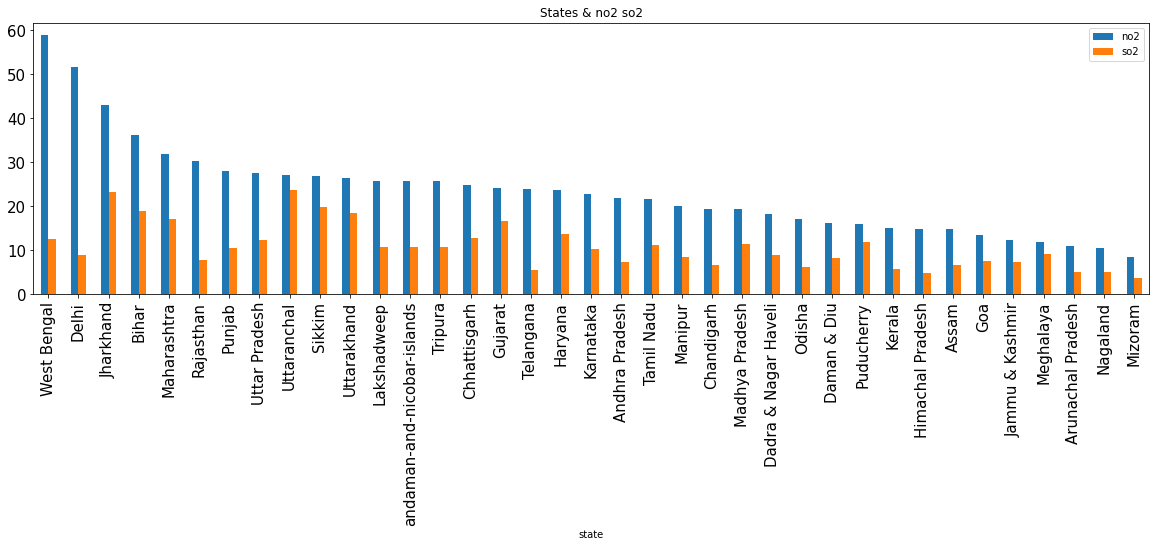

In [47]:
state_pollution = data[['state', 'no2', 'so2']].groupby('state').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('no2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,5), x = 'state', fontsize= 15, title = 'States & no2 so2')
print(state_pollution)
plt.show()


<AxesSubplot:>

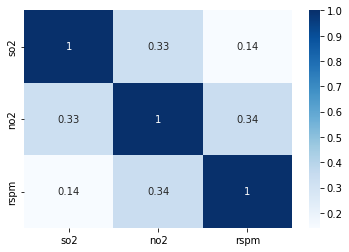

In [48]:
#etudion la correlation entre nos vriable target
sns.heatmap(data.corr(),annot=True,cmap= 'Blues')

Les nuances plus foncées indiquent une corrélation positive, tandis que les nuances plus claires représentent une corrélation négative/absolue.

faible correlation entre les variables so2, no2, rspm.

In [49]:
# Convert to datetime
from datetime import datetime

df=data.copy() 
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.year

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   state                        435742 non-null  object 
 1   location                     435742 non-null  object 
 2   agency                       435742 non-null  object 
 3   type                         435742 non-null  object 
 4   so2                          435742 non-null  float64
 5   no2                          435742 non-null  float64
 6   rspm                         435742 non-null  float64
 7   location_monitoring_station  435742 non-null  object 
 8   date                         435742 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.9+ MB


In [51]:
groupby = df.groupby(['date']).median()
group = groupby.reset_index().sort_values(by = 'date', ascending = False)
group

date        so2        no2        rspm
28  2015   6.000000  20.000000   86.000000
27  2014   7.000000  21.000000   86.000000
26  2013   7.500000  20.000000   91.000000
25  2012   8.000000  21.000000   91.000000
24  2011   8.000000  24.000000   97.000000
23  2010   8.000000  21.700000   89.333333
22  2009  10.000000  23.600000   96.000000
21  2008  10.400000  24.000000   95.000000
20  2007  10.700000  24.800000   92.000000
19  2006  10.500000  25.400000  100.000000
18  2005  10.829414  25.809623  104.000000
17  2004  10.000000  24.900000  108.832784
16  2003   7.000000  24.000000  108.832784
15  2002  10.400000  22.800000  108.832784
14  2001  12.000000  24.100000  108.832784
13  2000  13.600000  25.450000  108.832784
12  1999  14.800000  24.850000  108.832784
11  1998  13.500000  23.000000  108.832784
10  1997  14.100000  23.900000  108.832784
9   1996  13.800000  23.800000  108.832784
8   1995  13.800000  25.809623  108.832784
7   1994  15.400000  23.100000  108.832784
6   1993  14.700000  22.150000  108.832784
5   1992  12.200000  25.809623  108.832784
4   1991  11.250000  20.300000  108.832784
3   1990  11.400000  18.800000  108.832784
2   1989  11.800000  21.300000  108.832784
1   1988  12.200000  25.809623  108.832784
0   1987  11.300000  25.809623  108.832784

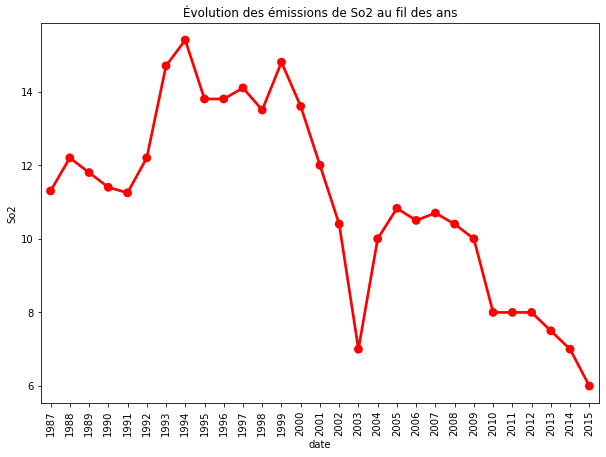

In [52]:
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'date', y = 'so2', data = group, color= 'r')
plt.xlabel('date')
plt.ylabel('So2')
plt.title('Évolution des émissions de So2 au fil des ans')
plt.show()

- SO2 - En 1990 - 2000, au cours de ces décennies, l'émission de So2 est à son maximum. Mais après 2000, au fil des ans, grâce aux mesures prises par les différents gouvernements pour réduire la quantité de SO2 émise, elle a été maîtrisée.

- Ce graphique montre une très bonne tendance. Nous pouvons voir que, globalement, l'émission de So2 est en très forte baisse au fil des année.

<AxesSubplot:title={'center':'So2 par état et année'}, xlabel='date', ylabel='state'>

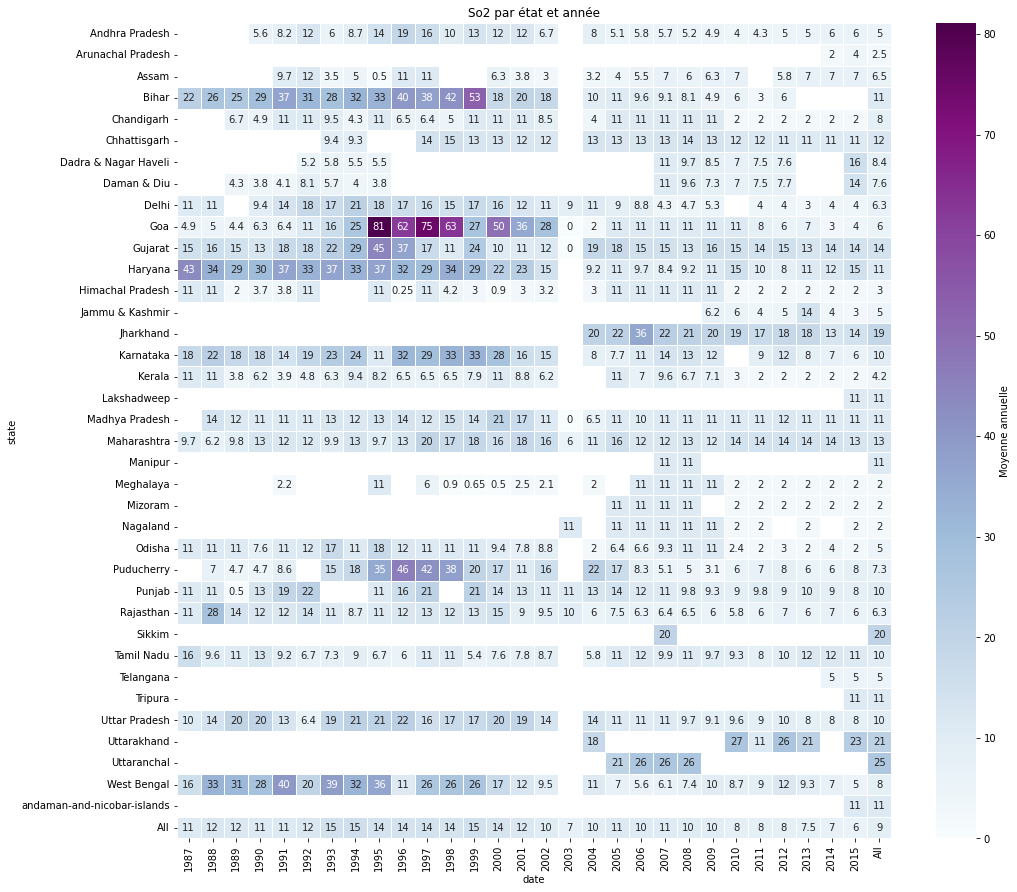

In [53]:
#Heatmap tableu croisé dynamique avec l'État comme ligne, l'année comme colonne et So2 comme valeur.
f, ax = plt.subplots(figsize=(16,15))
ax.set_title('So2 par état et année')
sns.heatmap(df.pivot_table('so2', index='state',
                columns=['date'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Moyenne annuelle'})

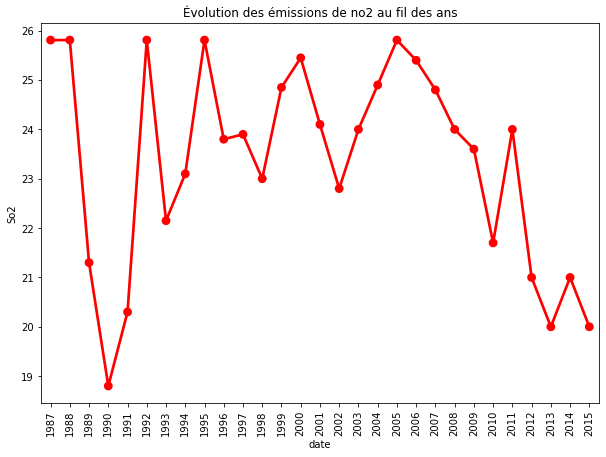

In [54]:
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'date', y = 'no2', data = group, color= 'r')
plt.xlabel('date')
plt.ylabel('So2')
plt.title('Évolution des émissions de no2 au fil des ans')
plt.show()

- NO2 - Mais dans le cas du No2, la pente de diminution des émissions suit après 2010, avant cela il montre un comportement similaire (si nous prenons la moyenne de 1987 - 2010) au fil des ans.

- Nous pouvons analyser, il y a beaucoup de hauts et de bas dans les niveaux d'émissions de No2. Cela peut être dû à des données manquantes. Après 1992, nous pouvons voir qu'à part quelques pics, il y a une tendance générale à la baisse, ce qui est un bon signe.

<AxesSubplot:title={'center':'No2 par état et année'}, xlabel='date', ylabel='state'>

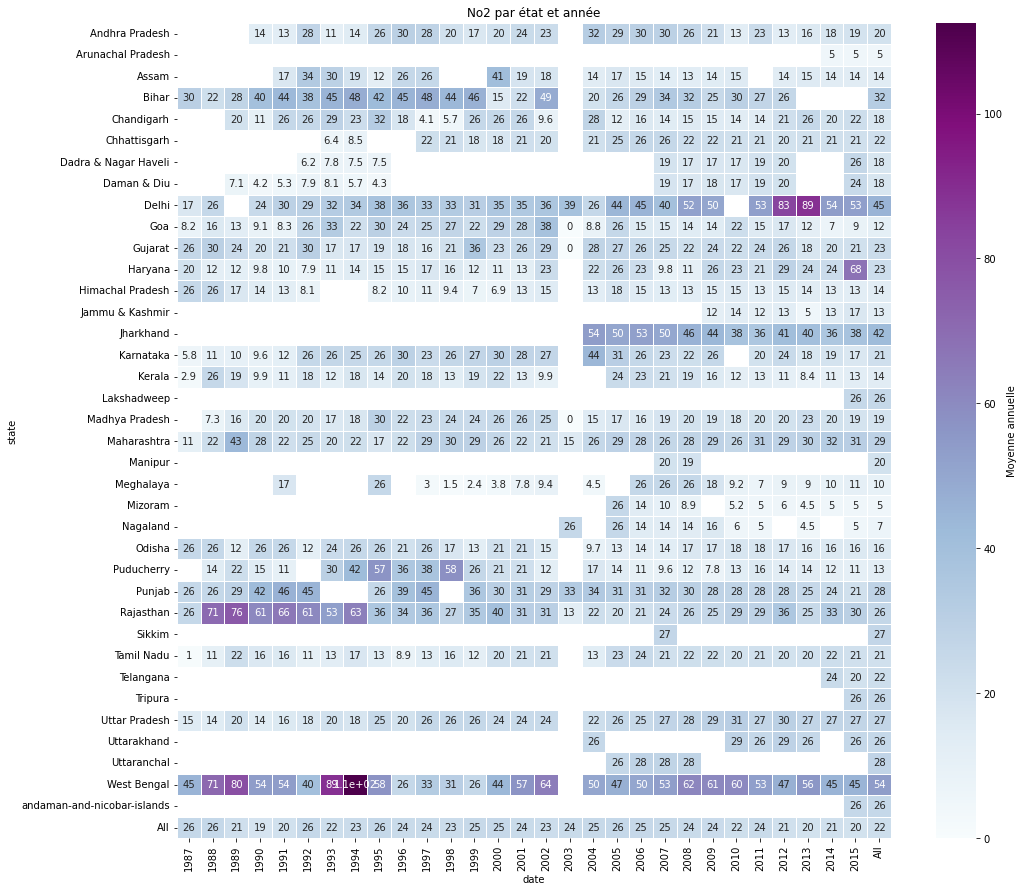

In [55]:
#Heatmap tableu croisé dynamique avec l'État comme ligne, l'année comme colonne et No2 comme valeur.
f, ax = plt.subplots(figsize=(16,15))
ax.set_title('No2 par état et année')
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['date'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Moyenne annuelle'})

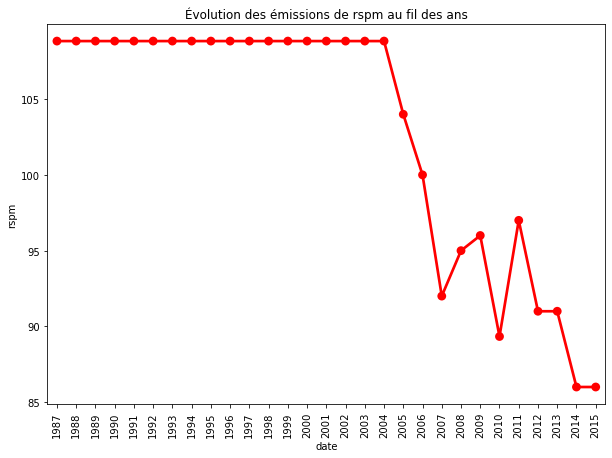

In [56]:
f,ax = plt.subplots(figsize = (10,7))
plt.xticks(rotation = 90)
sns.pointplot(x = 'date', y = 'rspm', data = group, color= 'r')
plt.xlabel('date')
plt.ylabel('rspm')
plt.title('Évolution des émissions de rspm au fil des ans')
plt.show()


- rspm - Dans ces mêmes années, l'émission de rspm est très importante, mais après 2005, elle montre une pente descendante. 

- Ce graphique montre une très bonne tendance. Nous pouvons voir que, globalement, l'émission de rspm est en très forte baisse.



<AxesSubplot:title={'center':'rspm par état et année'}, xlabel='date', ylabel='state'>

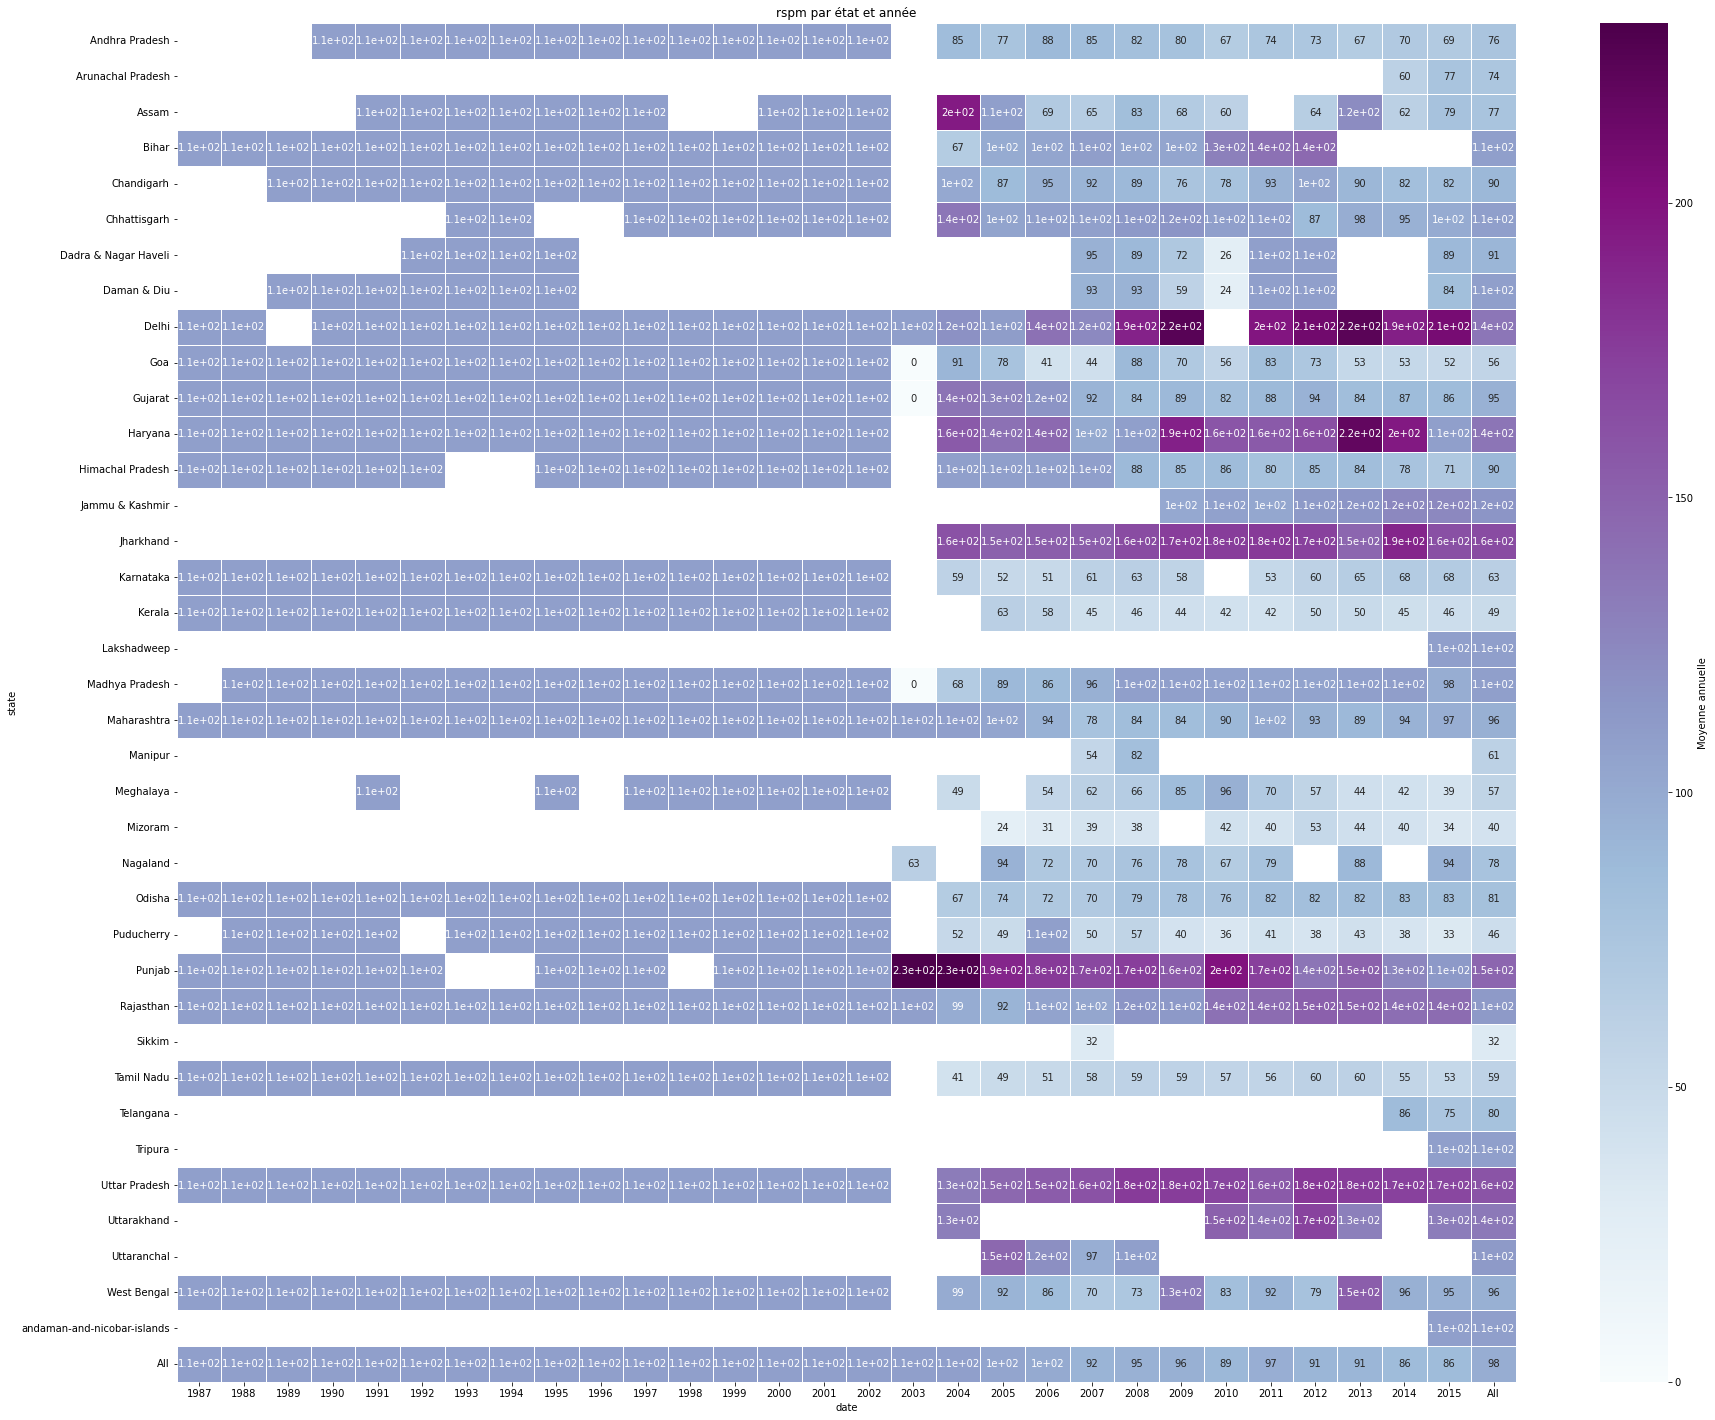

In [57]:
#Heatmap tableu croisé dynamique avec l'État comme ligne, l'année comme colonne et rspm comme valeur.
f, ax = plt.subplots(figsize=(30,25))
ax.set_title('rspm par état et année')
sns.heatmap(df.pivot_table('rspm', index='state',
                columns=['date'],aggfunc='median',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Moyenne annuelle'})

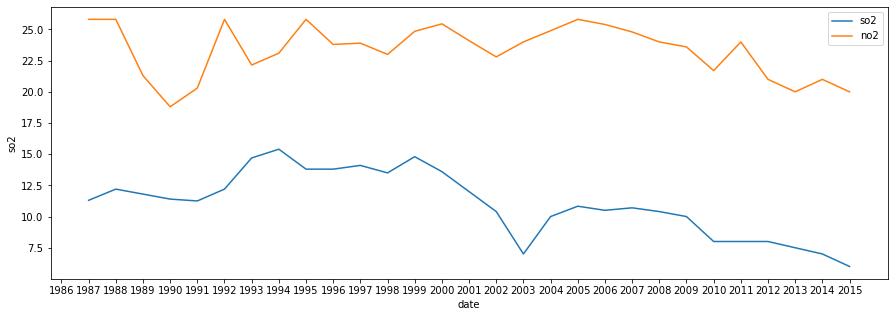

In [58]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='date',y='so2',data=group)
sns.lineplot(x='date',y='no2',data=group)
plt.legend(['so2','no2'])